In [17]:
#imports
from datetime import date, timedelta
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# get data
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{}.xlsx'
latest_date = date.today()
response = requests.get(url.format(latest_date))
if not response:
    latest_date = latest_date - timedelta(days=1)
    response = requests.get(url.format(latest_date))
assert response, 'No data from ECDC!'

In [19]:
# read data
data = pd.read_excel(response.content, 'COVID-19-geographic-disbtributi')

In [20]:
# prepare data
def prepareData(data, countryCode):
    country = data[data.geoId == countryCode]
    country_today = country[country.dateRep == latest_date.strftime('%Y-%m-%d')]['cases'].values[0]
    country = country.groupby('dateRep').cases.sum()
    country = country.groupby(country.index.to_period('y')).cumsum().reset_index()
    country_total = country[country.dateRep == latest_date.strftime('%Y-%m-%d')]['cases'].values[0]
    return country, country_total, country_today

serbia, serbia_total, serbia_today = prepareData(data, 'RS')
ireland, ireland_total, ireland_today = prepareData(data, 'IE')
slovenia, slovenia_total, slovenia_today = prepareData(data, 'SI')

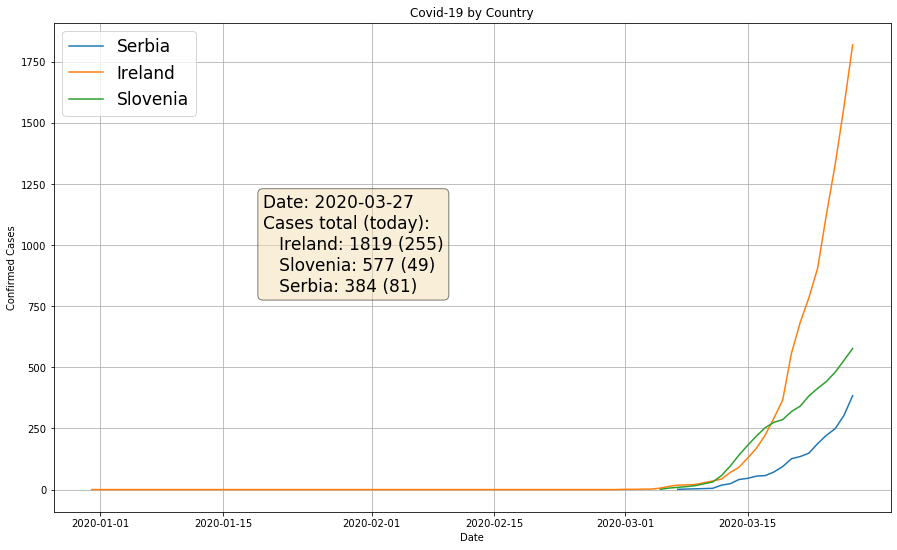

In [21]:
# plot data
fig, ax = plt.subplots(figsize=(15,9))
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Covid-19 by Country')
plt.grid(True)
ax.plot(serbia['dateRep'], serbia['cases'], label='Serbia')
ax.plot(ireland['dateRep'], ireland['cases'], label='Ireland')
ax.plot(slovenia['dateRep'], slovenia['cases'], label='Slovenia')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr = '\n'.join((
    'Date: {}'.format(latest_date),
    'Cases total (today):\n'
    '   Ireland: {} ({})'.format(ireland_total, ireland_today),
    '   Slovenia: {} ({})'.format(slovenia_total, slovenia_today),
    '   Serbia: {} ({})'.format(serbia_total, serbia_today),
    )
)
ax.text(0.25, 0.65, textstr, transform=ax.transAxes, fontsize=17,
        verticalalignment='top', bbox=props)

ax.legend(prop={'size': 17})
plt.show()